In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import os.path as osp

In [2]:
def max_length_in_list_of_list(lst):
    max_length = 0
    for i in range(len(lst)):
        if len(lst[i]) > max_length:
            max_length = len(lst[i])
    return max_length

def min_length_in_list_of_list(lst):
    min_length = float('inf')
    for i in range(len(lst)):
        if len(lst[i]) < min_length:
            min_length = len(lst[i])
    return min_length

def truncate_list_of_list_to_rectangular(lst):
    min_length = min_length_in_list_of_list(lst)
    for i in range(len(lst)):
        lst[i] =  lst[i][:min_length]
    return lst, min_length

In [9]:
def graph(log_dir, keys, graph=True, return_results=False):
    results = {}
    for key in keys:
        results[key] = []  
    with open(osp.join(log_dir, 'progress.csv'), newline='') as csvfile:
        results_reader = csv.DictReader(csvfile)
        for row in results_reader:
            for key in keys:
                results[key].append(row[key])
    for key in keys:
        results[key] = np.array(results[key]).astype(np.float)
    if graph:
        plt.plot(results[keys[0]], results[keys[1]])
    if return_results:
        return results

def graph_multiple(log_dirs, keys, title='MazeB-v0', label=None):
    all_results = {}
    for key in keys:
        all_results[key] = []
    for log_dir in log_dirs:
        results = graph(log_dir, keys, graph=False, return_results=True)
        all_results[keys[0]] = results[keys[0]]
        for key in keys[1:]:
            all_results[key].append(results[key])
    for key in keys[1:]:
        all_results[key], min_length = truncate_list_of_list_to_rectangular(all_results[key])
        all_results[key] = np.array(all_results[key]).astype(np.float)
        all_results[key + '_mean'] = np.mean(all_results[key], axis=0)
        all_results[key + '_std'] = np.std(all_results[key], axis=0)
    all_results[keys[0]] = all_results[keys[0]][:min_length]
    all_results[keys[0]] = np.array(all_results[keys[0]]).astype(np.float)
    
    X = all_results[keys[0]]
    Y_mean = all_results[keys[1] + '_mean']
    Y_std = all_results[keys[1] + '_std']
    
    plt.plot(X, Y_mean, label=label)
    plt.fill_between(X, Y_mean - Y_std, Y_mean + Y_std, alpha=.1)
    plt.title(title)
    plt.xlabel('timesteps')
    plt.ylabel('success rate')
    plt.ylim([0, 1.05])


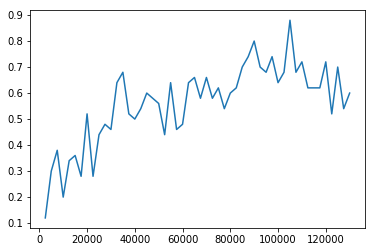

In [10]:
graph("./data/maze", ['train/timesteps', 'train/success_rate'])
plt.show()

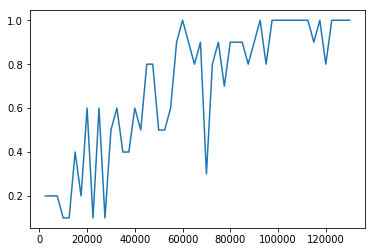

In [11]:
graph("./data/maze", ['train/timesteps', 'test/success_rate'])
plt.show()

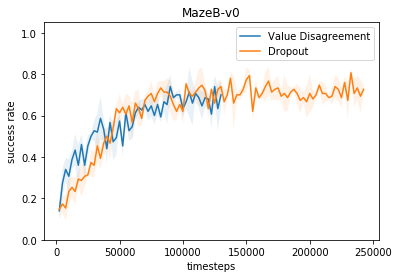

In [14]:
graph_multiple(["./data/maze", "./data/mazeA-vds", "../data/mazeA-vds-cpu-3"], ['train/timesteps', 'train/success_rate'], label='Value Disagreement')
graph_multiple(["./data/mazeB-dropout-1", "./data/mazeB-dropout-2", "./data/mazeB-dropout-3"], ['train/timesteps', 'train/success_rate'], label='Dropout')
plt.legend()
plt.show()



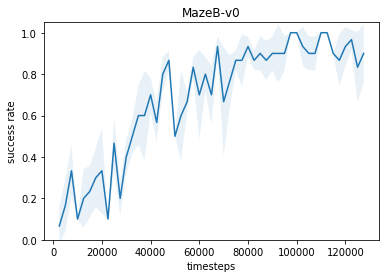

In [7]:
graph_multiple(["./data/maze", "./data/mazeA-vds", "../data/mazeA-vds-cpu-3"], ['train/timesteps', 'test/success_rate'],)


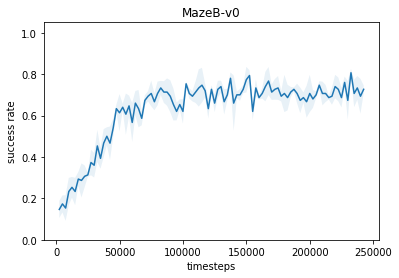